In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Dataset
df=pd.read_csv(r'file:///C:\Users\SHAKIR\OneDrive\Desktop\DATASET\car_age_price.csv')

In [3]:

df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
df.info()#information about the DataFram

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
df.shape#(rows,columns)
     

(112, 2)

In [6]:
df.describe()# returns description of the data in the DataFrame.

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [7]:
#Null value checking

In [8]:

df.isnull().sum()#or df.isna().null()

Year     0
Price    0
dtype: int64

#Correlation between feature variable Year and target variable Price

In [10]:

df.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


They have high positive correlation having correlation coefficient(r) value of 0.776,so a linear model can created using them.

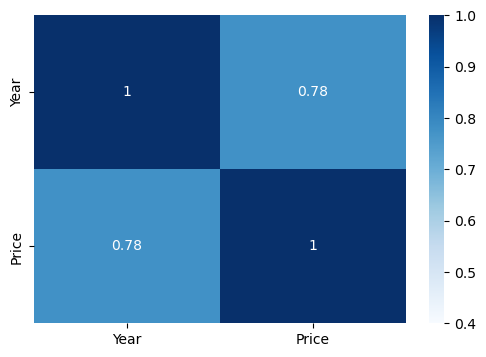

In [11]:
#HEATMAP


corrmatrix=df.corr()
plt.subplots(figsize=(6,4))
sns.heatmap(corrmatrix,vmin=0.4,vmax=1,annot=True,cmap='Blues');


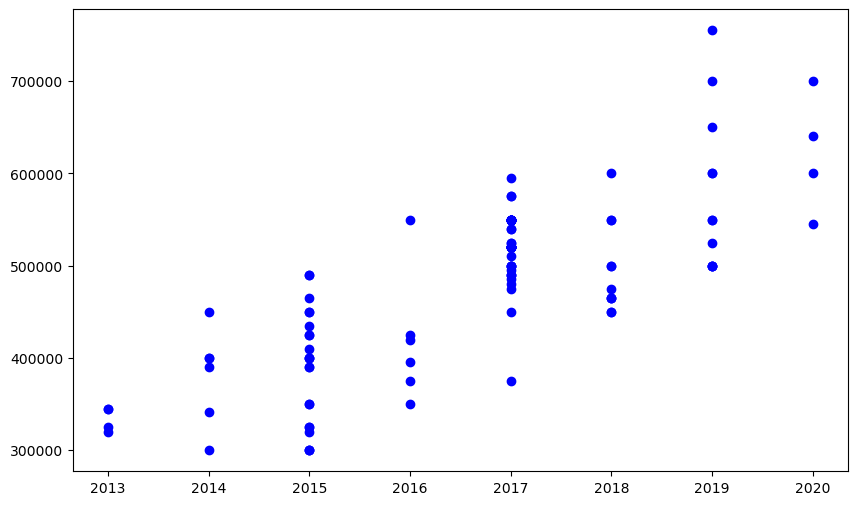

In [12]:
#Scatter Plot between Year and Price
plt.figure(figsize =(10, 6))
plt.scatter(df['Year'], df['Price'], color ="blue");

Scatter plot also show positive correlation between Year and Price

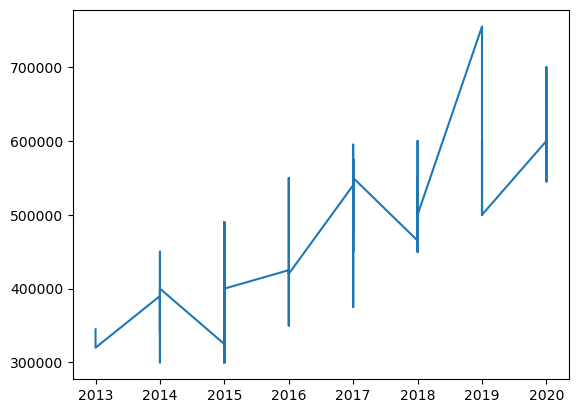

In [13]:
#Line Plot between Year and Price
z=df.sort_values(by='Year')
plt.plot(z['Year'],z['Price'])

# LINEAR REGRESSION MODEL


In [14]:
#y is the target,x is the feature 
y=df['Price']
x=df.drop('Price',axis=1)

In [15]:
from sklearn.model_selection import train_test_split


In [17]:


#splitting x and y values into training and testing data,test size taken is 25% and random state set to 42
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [18]:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()#creating an instance of LinearRegression()
model=lr.fit(x_train,y_train)#creating the model using training data
y_pred=model.predict(x_test)#predicting values using the model created using training data

In [19]:

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

Mean squared Error on test set :  3878767151.0734487


In [20]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is:',mean_squared_error(y_test,y_pred))#MSE value
print('R sqaured value is:',r2_score(y_test,y_pred))#R

MSE is: 3878767151.073449
R sqaured value is: 0.4347961632108023


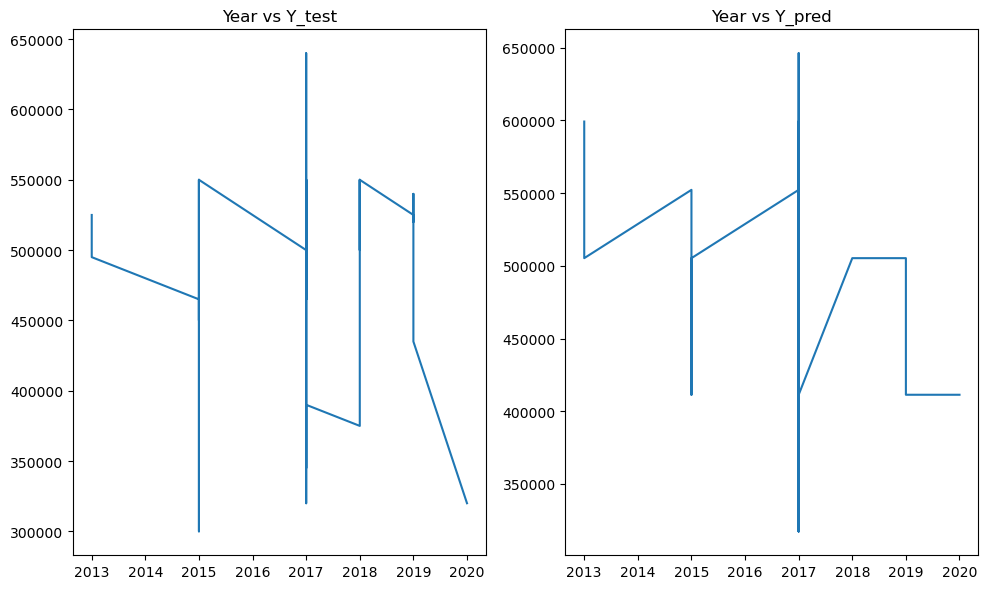

In [21]:
plt.figure(figsize=(10,6))
x1=x_test.sort_values(by='Year')

plt.subplot(1,2,1)
plt.plot(x1,y_test)#plotting Year and Y_test values
plt.title('Year vs Y_test')

plt.subplot(1,2,2)
plt.plot(x1,y_pred);#plotting Year and Y_pred values
plt.title('Year vs Y_pred')

plt.tight_layout()
     


Predicting the possible price of a 2022 model second-hand grand i10(using Linear Regression)

# Method 1


In [22]:
#predicting  the possible price of a 2022 model second-hand grand i10
x_test2022=np.array([[2022]])#passing value 2022 as in an array

ypred2022=model.predict(x_test2022)#model prediction

C:\Users\SHAKIR\OneDrive\Desktop\New folder\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
ypred2022#predicted car price for 2022

array([740160.11937766])

# Method2

In [24]:
x_test2022=pd.DataFrame([2022],columns=['Year'])#paasing value 2022 as in DataFrame
ypred2022=model.predict(x_test2022)#model prediction

In [25]:

ypred2022#predicted car price for 2022

array([740160.11937766])

The predicted possible price of a 2022 model second-hand grand i10 (by Linear Regression) is 740160.119 units.


# Standard Scaling on feature 'Year

In [26]:

df2=df.drop('Price',axis=1)

In [27]:
from sklearn.preprocessing import StandardScaler
stdsclr= StandardScaler()#creating the instance
x2=stdsclr.fit_transform(df2)#X2 is an array

In [29]:
x2=pd.DataFrame(x2,columns=['Year'])#converting back into dataframe

In [30]:

x2


,Year
0,0.820032
1,1.436431
2,1.436431
3,0.820032
4,0.820032
...,...
107,-0.412768
108,-1.645567
109,-1.029167
110,-0.412768


In [31]:
x3=pd.concat([x2,df['Price']],axis=1)#concatenating 

In [32]:

x3

,Year,Price
0,0.820032,465000
1,1.436431,755000
2,1.436431,700000
3,0.820032,465000
4,0.820032,465000
...,...,...
107,-0.412768,375000
108,-1.645567,300000
109,-1.029167,425000
110,-0.412768,420000


# Linear Regression analysis after scaling the feature Year

In [33]:
x1=x3.drop('Price',axis=1)
y1=df['Price']
     

In [35]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.25,random_state=42)

In [36]:
model=lr.fit(x_train1,y_train1)#creating the model using training data
y_pred1=model.predict(x_test1)#predicting values

In [37]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is:',mean_squared_error(y_test1,y_pred1))
     

MSE is: 3878767151.0726194


In [38]:
print('R sqaured value is:',r2_score(y_test1,y_pred1))

R sqaured value is: 0.4347961632109232


In [39]:
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((y_pred1 - y_test1)**2)
print("Mean squared Error on test set : ", mean_squared_error)

Mean squared Error on test set :  3878767151.0726204


# Lasso Regression
It is a Regularization Method to reduce Overfitting.
With Lasso when we increase the value of Lambda(alpha) the most important parameters shrink a little bit and the less important parameters goes closed to zero. So, Lasso is able to exclude silly parameters from the model.

In [40]:
from sklearn.linear_model import Lasso

In [42]:
from sklearn.model_selection import train_test_split

#splitting x and y values into training and testing data,test size taken is 25% and random state set to 42
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

alpha=0.1

In [43]:
ls=Lasso(alpha=0.1)
model=ls.fit(x_train,y_train)#creating the model using training data
y_pred=model.predict(x_test)#predicting values

In [44]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R sqaured value is:',r2_score(y_test,y_pred))

MSE is: 3878764025.5442586
R sqaured value is: 0.43479661865476726


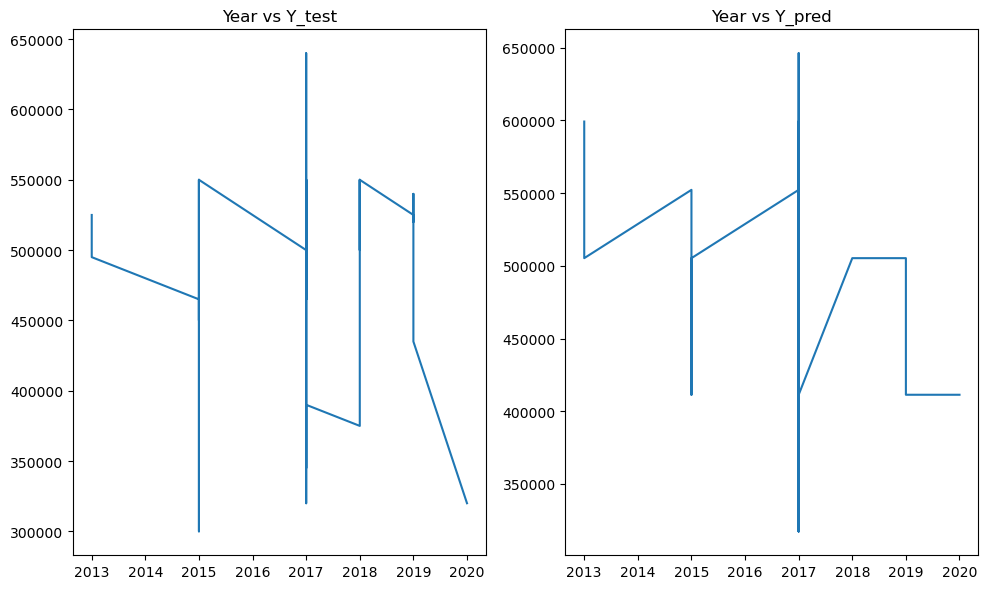

In [45]:
plt.figure(figsize=(10,6))
x1=x_test.sort_values(by='Year')

plt.subplot(1,2,1)
plt.plot(x1,y_test)#plotting Year and Y_test values
plt.title('Year vs Y_test')

plt.subplot(1,2,2)
plt.plot(x1,y_pred);#plotting Year and Y_pred values
plt.title('Year vs Y_pred')

plt.tight_layout()

# Method 1

In [46]:
#predicting  the possible price of a 2022 model second-hand grand i10
x_test2022=np.array([[2022]])

ypred2022=model.predict(x_test2022)#predicting values
     

C:\Users\SHAKIR\OneDrive\Desktop\New folder\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [47]:
ypred2022#predicted car price for 2022

array([740159.90314002])

# Method 2

In [48]:
x_test2022=pd.DataFrame([2022],columns=['Year'])#paasing value 2022 as in DataFrame
ypred2022=model.predict(x_test2022)#model prediction

In [49]:
ypred2022#predicted car price for 2022

array([740159.90314002])

# alpha=1

In [50]:
ls=Lasso(alpha=1)
model=ls.fit(x_train,y_train)#creating the model using training data
y_pred=model.predict(x_test)#predicting values
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R sqaured value is:',r2_score(y_test,y_pred))

MSE is: 3878735896.222091
R sqaured value is: 0.4348007175862566


In [51]:
x_test2022=pd.DataFrame([2022],columns=['Year'])#paasing value 2022 as in DataFrame
ypred2022=model.predict(x_test2022)#model predictionypred2022#predicted car price for 2022
ypred2022#predicted car price for 2022

array([740157.95700142])

The predicted possible price of a 2022 model second-hand grand i10 (by Lasso Regression and alpha=1) is 740157.957 units.

# Overall Conclusion
   
   LINEAR REGRESSION
   
1.MSE is: 3878767151.073449

2.R sqaured value is: 0.4347961632108023


   

# Lasso Regression(alpha=0.1):-
1.MSE is: 3878764025.5442586

2.R sqaured value is: 0.43479661865476726

# Lasso Regression(alpha=1):-
1.MSE is: 3878735896.222091

2.R sqaured value is: 0.4348007175862566

# The predicted possible price of a 2022 model second-hand grand i10 ,
1.(by Linear Regression) is 740160.119 units.

2.(by Lasso Regression and alpha=0.1) is 740159.903 units.

3.(by Lasso Regression and alpha=1) is 740157.957 units.

# There isn't big difference in MSE ,R2 Score and Predcited car price of the year 2022 by performing both Linear and Lasso Regression ,the results are seems to be same.